In [5]:
!pip install shap --user


  Using cached shap-0.44.1-cp38-cp38-win_amd64.whl (450 kB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)


In [1]:
import shap


In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Explainability
import shap

# Warnings off for clean output
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv("HR-Employee-Attrition.csv")  # Use your file path here
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Dataset Shape: (1470, 35)

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany            

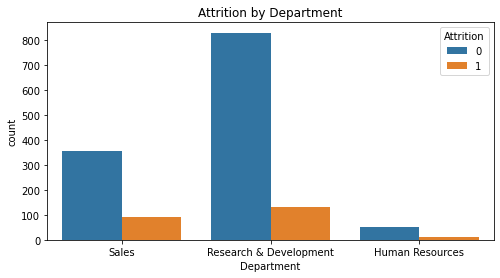

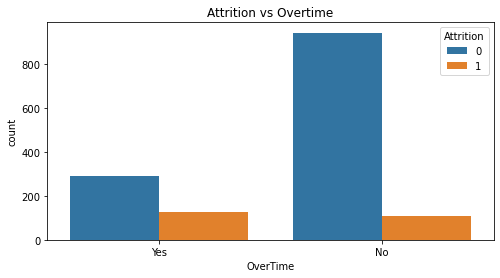

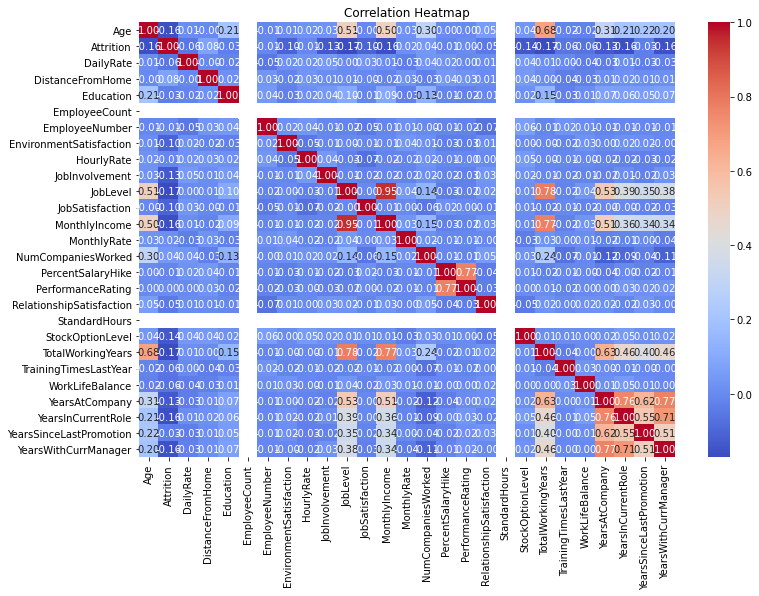

In [4]:
# Basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['Attrition'].value_counts())

# Convert target to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Visual: Attrition by Department
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.show()

# Visual: Attrition vs Overtime
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition vs Overtime")
plt.show()

# Correlation Heatmap (numerical)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Drop unnecessary columns
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
[[252   3]
 [ 39   0]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       255
           1       0.00      0.00      0.00        39

    accuracy                           0.86       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.75      0.86      0.80       294



In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[254   1]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



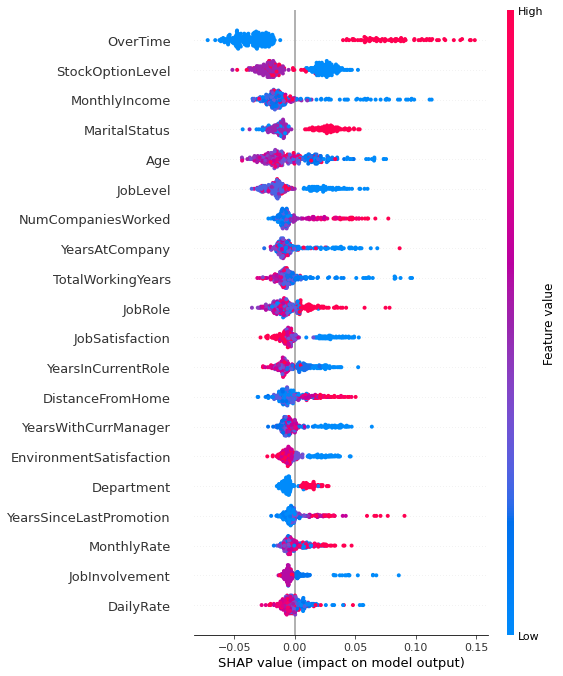

In [8]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[1], X_test)


In [9]:
# Display key HR findings as comments (add to your report)

"""
Key HR Insights from SHAP & EDA:
- Overtime is the strongest factor leading to attrition.
- Lower monthly income also correlates with higher attrition.
- Job level and environment satisfaction also matter.

Suggested Retention Strategies:
- Reduce overtime and improve work-life balance.
- Reassess salary packages for lower-income roles.
- Improve job satisfaction through engagement and promotion paths.
"""


'\nKey HR Insights from SHAP & EDA:\n- Overtime is the strongest factor leading to attrition.\n- Lower monthly income also correlates with higher attrition.\n- Job level and environment satisfaction also matter.\n\nSuggested Retention Strategies:\n- Reduce overtime and improve work-life balance.\n- Reassess salary packages for lower-income roles.\n- Improve job satisfaction through engagement and promotion paths.\n'

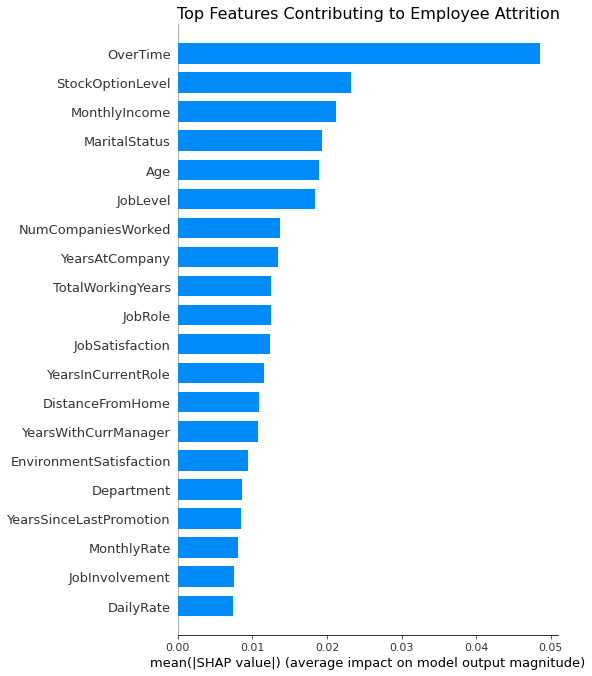

In [10]:
# Better SHAP summary plot with clean bar style
plt.title("Top Features Contributing to Employee Attrition", fontsize=16)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")
